In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Load accounts dataset
df_contas = pd.read_csv('../banvic/seeds/banvic/contas.csv')
print(f"✅ Loaded {len(df_contas):,} account records")

# Convert date columns
df_contas['data_abertura'] = pd.to_datetime(df_contas['data_abertura'], format='mixed')
df_contas['data_ultimo_lancamento'] = pd.to_datetime(df_contas['data_ultimo_lancamento'], format='mixed')
print("✅ Date columns converted successfully")


✅ Loaded 999 account records
✅ Date columns converted successfully


# Análise Descritiva - Contas

In [3]:
print("\n💳 CONTAS ANALYSIS")
print("=" * 50)

# Basic info
print("📋 Basic Information:")
print(f"   - Total accounts: {len(df_contas):,}")
print(f"   - Columns: {list(df_contas.columns)}")
print(f"   - Missing values: {df_contas.isnull().sum().sum()}")

# Account types
print(f"\n🏦 Account Types:")
print(df_contas['tipo_conta'].value_counts())

# Balance analysis
print(f"\n💰 Balance Analysis:")
print(f"   - Total balance: R$ {df_contas['saldo_total'].sum():,.2f}")
print(f"   - Available balance: R$ {df_contas['saldo_disponivel'].sum():,.2f}")
print(f"   - Average total balance: R$ {df_contas['saldo_total'].mean():,.2f}")
print(f"   - Average available balance: R$ {df_contas['saldo_disponivel'].mean():,.2f}")
print(f"   - Balance range: R$ {df_contas['saldo_total'].min():,.2f} - R$ {df_contas['saldo_total'].max():,.2f}")

# Account opening timeline
print(f"\n📅 Account Opening Timeline:")
print(f"   - First account opened: {df_contas['data_abertura'].min()}")
print(f"   - Latest account opened: {df_contas['data_abertura'].max()}")
print(f"   - Accounts opened by year:")
print(df_contas['data_abertura'].dt.year.value_counts().sort_index())

# Account age analysis
df_contas['idade_conta_dias'] = (pd.Timestamp.now(tz='UTC') - df_contas['data_abertura']).dt.days
df_contas['idade_conta_anos'] = df_contas['idade_conta_dias'] / 365.25
print(f"\n⏰ Account Age Analysis:")
print(f"   - Average account age: {df_contas['idade_conta_anos'].mean():.1f} years")
print(f"   - Oldest account: {df_contas['idade_conta_anos'].max():.1f} years")
print(f"   - Newest account: {df_contas['idade_conta_anos'].min():.1f} years")



💳 CONTAS ANALYSIS
📋 Basic Information:
   - Total accounts: 999
   - Columns: ['num_conta', 'cod_cliente', 'cod_agencia', 'cod_colaborador', 'tipo_conta', 'data_abertura', 'saldo_total', 'saldo_disponivel', 'data_ultimo_lancamento']
   - Missing values: 0

🏦 Account Types:
tipo_conta
PF    999
Name: count, dtype: int64

💰 Balance Analysis:
   - Total balance: R$ 26,516,863.81
   - Available balance: R$ 25,705,454.40
   - Average total balance: R$ 26,543.41
   - Average available balance: R$ 25,731.19
   - Balance range: R$ 1.22 - R$ 419,923.18

📅 Account Opening Timeline:
   - First account opened: 2010-02-02 14:28:00+00:00
   - Latest account opened: 2022-12-27 13:30:00+00:00
   - Accounts opened by year:
data_abertura
2010     11
2011     24
2012     32
2013     47
2014     48
2015     66
2016     74
2017     96
2018    102
2019    113
2020    112
2021    135
2022    139
Name: count, dtype: int64

⏰ Account Age Analysis:
   - Average account age: 7.2 years
   - Oldest account: 15.6 

# Visualizações

## Contas por tipo

Text(0, 0.5, '')

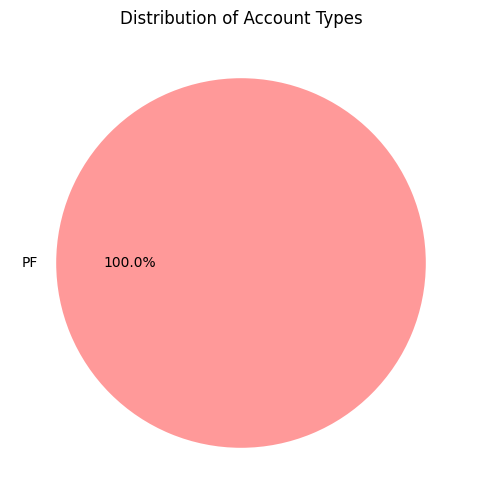

In [4]:
plt.figure(figsize=(6, 6))
df_contas['tipo_conta'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Distribution of Account Types')
plt.ylabel('')


## Saldo total

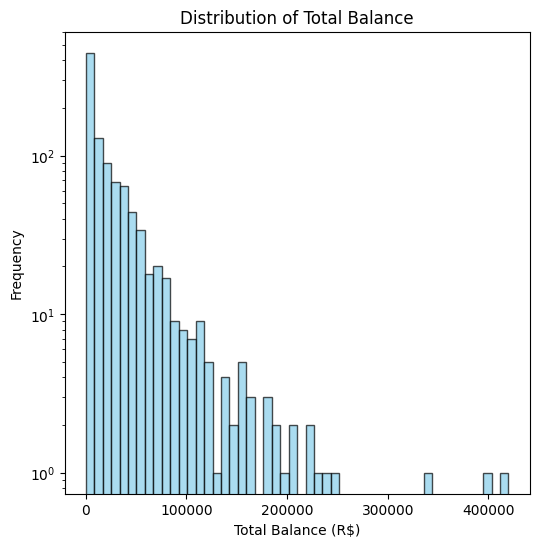

In [5]:
plt.figure(figsize=(6, 6))
plt.hist(df_contas['saldo_total'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Balance')
plt.xlabel('Total Balance (R$)')
plt.ylabel('Frequency')
plt.yscale('log')  # Log scale due to wide range

## Saldo disponível

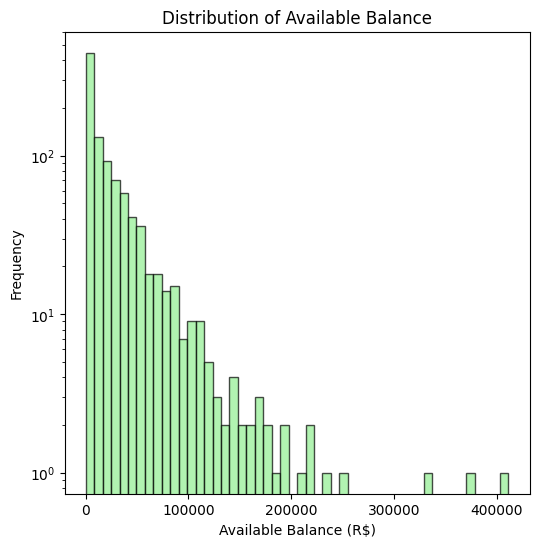

In [6]:
plt.figure(figsize=(6, 6))
plt.hist(df_contas['saldo_disponivel'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribution of Available Balance')
plt.xlabel('Available Balance (R$)')
plt.ylabel('Frequency')
plt.yscale('log')  # Log scale due to wide range

## Abertura de contas por tempo

Text(0, 0.5, 'Number of Accounts')

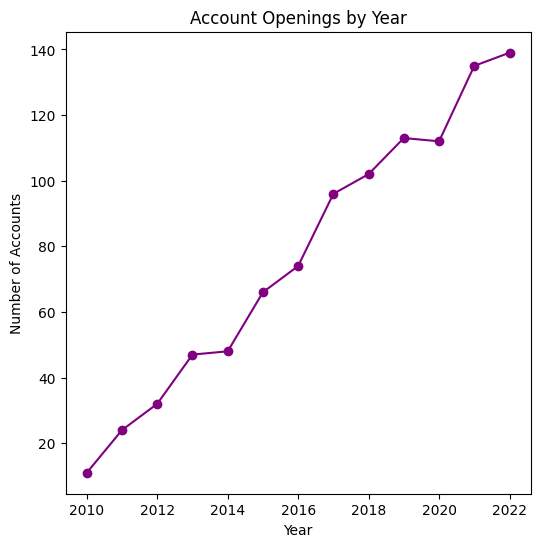

In [7]:
plt.figure(figsize=(6, 6))
df_contas['data_abertura'].dt.year.value_counts().sort_index().plot(kind='line', marker='o', color='purple')
plt.title('Account Openings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accounts')

## Saldo por tipo de conta

Text(0.5, 0.98, '')

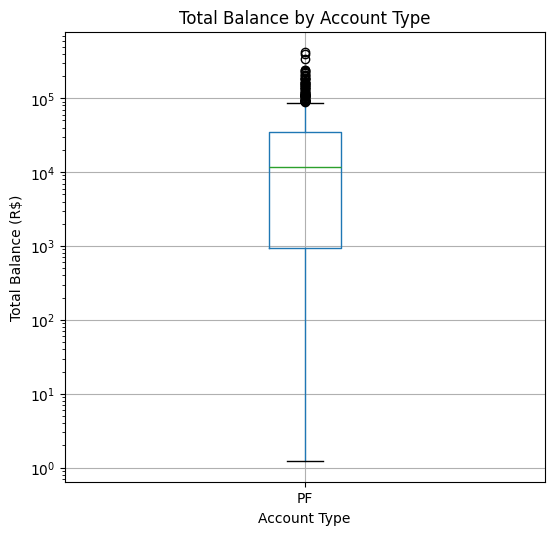

In [8]:
plt.figure(figsize=(6, 6))
df_contas.boxplot(column='saldo_total', by='tipo_conta', ax=plt.gca())
plt.title('Total Balance by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Total Balance (R$)')
plt.yscale('log')
plt.suptitle('')  # Remove default title

## Idade de conta

Text(0, 0.5, 'Frequency')

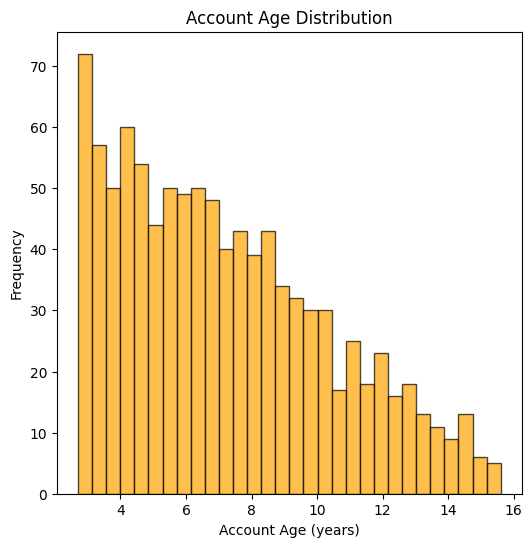

In [9]:
plt.figure(figsize=(6, 6))
plt.hist(df_contas['idade_conta_anos'], bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.title('Account Age Distribution')
plt.xlabel('Account Age (years)')
plt.ylabel('Frequency')

## Saldo por Idade de conta

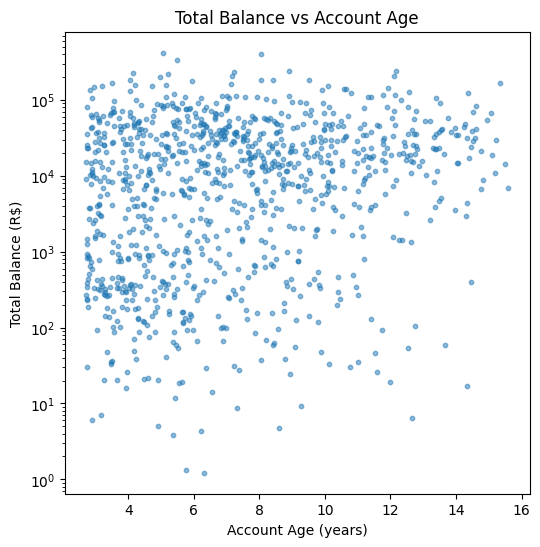

In [10]:
plt.figure(figsize=(6, 6))
plt.scatter(df_contas['idade_conta_anos'], df_contas['saldo_total'], alpha=0.5, s=10)
plt.title('Total Balance vs Account Age')
plt.xlabel('Account Age (years)')
plt.ylabel('Total Balance (R$)')
plt.yscale('log')


## Saldo disponível por Saldo total

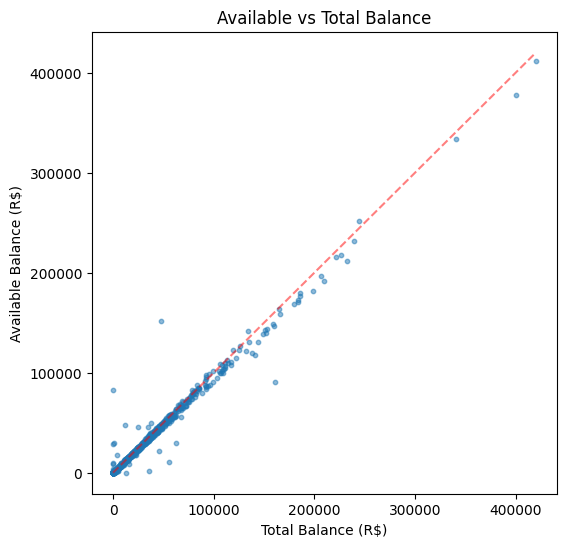

In [11]:
plt.figure(figsize=(6, 6))
plt.scatter(df_contas['saldo_total'], df_contas['saldo_disponivel'], alpha=0.5, s=10)
plt.title('Available vs Total Balance')
plt.xlabel('Total Balance (R$)')
plt.ylabel('Available Balance (R$)')
plt.plot([0, df_contas['saldo_total'].max()], [0, df_contas['saldo_total'].max()], 'r--', alpha=0.5)  # 45-degree line

## Última transação de conta por ano

(array([2012., 2014., 2016., 2018., 2020., 2022., 2024.]),
 [Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024')])

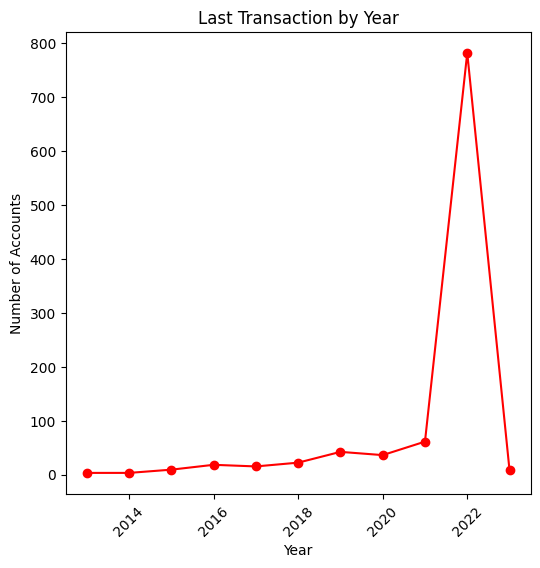

In [12]:
plt.figure(figsize=(6, 6))
df_contas['data_ultimo_lancamento'].dt.year.value_counts().sort_index().plot(kind='line', marker='o', color='red')
plt.title('Last Transaction by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accounts')
plt.xticks(rotation=45)


In [13]:
# Summary statistics
print(f"\n📊 Summary Statistics:")
print(f"   - Total balance: R$ {df_contas['saldo_total'].sum():,.2f}")
print(f"   - Available balance: R$ {df_contas['saldo_disponivel'].sum():,.2f}")
print(f"   - Average account age: {df_contas['idade_conta_anos'].mean():.1f} years")
print(f"   - Most common account type: {df_contas['tipo_conta'].value_counts().index[0]}")
print(f"   - Accounts with zero balance: {(df_contas['saldo_total'] == 0).sum():,}")
print(f"   - Accounts with negative balance: {(df_contas['saldo_total'] < 0).sum():,}")
print(f"   - Accounts with available > total: {(df_contas['saldo_disponivel'] > df_contas['saldo_total']).sum():,}")
print(f"   - Average balance per account type:")
for tipo in df_contas['tipo_conta'].unique():
    avg_balance = df_contas[df_contas['tipo_conta'] == tipo]['saldo_total'].mean()
    print(f"     - {tipo}: R$ {avg_balance:,.2f}")



📊 Summary Statistics:
   - Total balance: R$ 26,516,863.81
   - Available balance: R$ 25,705,454.40
   - Average account age: 7.2 years
   - Most common account type: PF
   - Accounts with zero balance: 0
   - Accounts with negative balance: 0
   - Accounts with available > total: 248
   - Average balance per account type:
     - PF: R$ 26,543.41
